# Домашнее задание (30 баллов)

* Для задачи 1 используйте данные:[сеть](https://drive.google.com/file/d/1W5GrHAvxG4AjFm6kzwNyzoAA7jt48cJ5/view?usp=sharing), [метки вершин](https://drive.google.com/file/d/1CXh27cW2J5HzmIpqy1PFoeE_Cse7oDPW/view?usp=sharing). 

* Для задачи 2,3 [данные](https://snap.stanford.edu/data/email-Eu-core.html) (предварительно сделайте сеть ненаправленной).

## 1. Классификация вершин (10 баллов) 

Будем решать задачу предсказания влиятельности вершин как задачу классификации. Разобьем отрезок $\left [ s_{i}^{min},s_{i}^{max}\right ]$ на $k$ одинаковых отрезков, и разметим вершины, чьи значения $s_{i}$ лежит в $\left[s_i^{(j-1)},s_i^{(j)} \right)$, $j = 1, 2 \dots k$, меткой $j$, т.е. значение класса $l_i$ для $i$-ой вершины определяется: 

$$
l_i=\left [k \frac{s_i-s_i^{min}}{s_i^{max}-s_i^{min}}\right]. 
$$

Для k=2 задача превращается в задачу бинарной классификации. 

1. Вычислите различные структурные признаки вершин: центральности, кластеризацию, k-core

2.  Исследуйте корреляцию между признаками и целевой переменой 

3. Разделите выборку на обучающую и тестовую, постройте модели классификации (бинарной), выведите метрики качества, подберите оптимальные гиперпараметры

4. Проанализируйте важность признаков 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx 
import pandas as pd
import pandas as pd
import random
%matplotlib inline

In [ ]:
#from google.colab import files
#files.upload()
import gdown

!gdown --id 1W5GrHAvxG4AjFm6kzwNyzoAA7jt48cJ5


Downloading...
From: https://drive.google.com/uc?id=1W5GrHAvxG4AjFm6kzwNyzoAA7jt48cJ5
To: /content/ca-GrQc.mtx
100% 140k/140k [00:00<00:00, 4.50MB/s]


In [ ]:
G=nx.read_adjlist('ca-GrQc.mtx')
print(G.number_of_nodes(),G.number_of_edges())

4158 13422


In [ ]:
!gdown --id 1CXh27cW2J5HzmIpqy1PFoeE_Cse7oDPW

df=pd.read_csv('spreading_data_ca-GrQc.csv')
df.head()

Downloading...
From: https://drive.google.com/uc?id=1CXh27cW2J5HzmIpqy1PFoeE_Cse7oDPW
To: /content/spreading_data_ca-GrQc.csv
100% 104k/104k [00:00<00:00, 3.34MB/s]


,node,spreading ability
0,19,0.414141
1,1,0.418711
2,1751,0.402116
3,2408,0.389610
4,3078,0.409572


In [ ]:
k=2 # для бинарной классификации
s=list(df['spreading ability'])
l=[]
for v in s: 
  t=k*(v-df['spreading ability'].min())//(df['spreading ability'].max()-df['spreading ability'].min())
  if (t==k):
    t=k-1
  l.append(t)

Y=np.array(l)

In [ ]:
Y

array([1., 1., 1., ..., 1., 0., 1.])

#### 1.1. Вычислите различные структурные признаки вершин: центральности, кластеризацию, k-core

In [ ]:
degree_central = nx.degree_centrality(G)
eigenvector_central = nx.eigenvector_centrality(G)
closeness_central = nx.closeness_centrality(G)
betweenness_central = nx.betweenness_centrality(G)

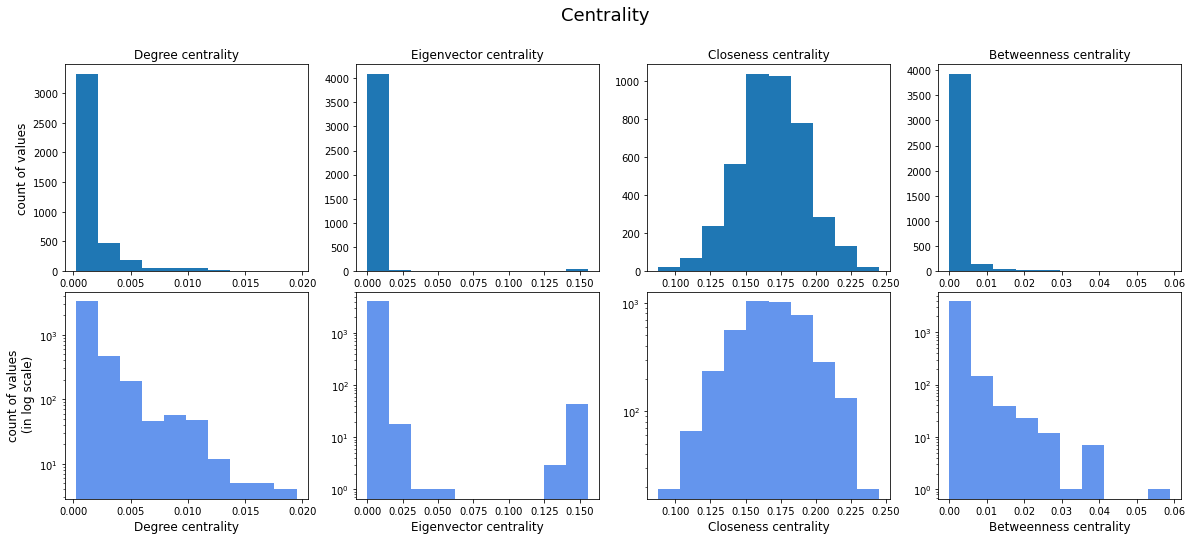

In [ ]:
fig, ax = plt.subplots(nrows=2,ncols=4,figsize=(20, 8))
  
ax[0][0].hist(list(degree_central.values()))
ax[0][0].set_title('Degree centrality', fontsize=12)
ax[0][0].set_ylabel('count of values', fontsize=12)

ax[0][1].hist(list(eigenvector_central.values()))
ax[0][1].set_title('Eigenvector centrality', fontsize=12)

ax[0][2].hist(list(closeness_central.values()))
ax[0][2].set_title('Closeness centrality', fontsize=12)

ax[0][3].hist(list(betweenness_central.values()))
ax[0][3].set_title('Betweenness centrality', fontsize=12)
  
ax[1][0].hist(list(degree_central.values()), color='cornflowerblue')
ax[1][0].set_xlabel('Degree centrality', fontsize=12)
ax[1][0].set_ylabel('count of values\n (in log scale)', fontsize=12)
ax[1][0].set_yscale('log')

ax[1][1].hist(list(eigenvector_central.values()), color='cornflowerblue')
ax[1][1].set_xlabel('Eigenvector centrality', fontsize=12)
ax[1][1].set_yscale('log')

ax[1][2].hist(list(closeness_central.values()), color='cornflowerblue')
ax[1][2].set_xlabel('Closeness centrality', fontsize=12)
ax[1][2].set_yscale('log')

ax[1][3].hist(list(betweenness_central.values()), color='cornflowerblue')
ax[1][3].set_xlabel('Betweenness centrality', fontsize=12)
ax[1][3].set_yscale('log')

fig.suptitle('Centrality', fontsize=18)
plt.subplots_adjust(hspace=0.1)#wspace=0.2

plt.show()

In [ ]:
arr_clust_coef = nx.clustering(G)

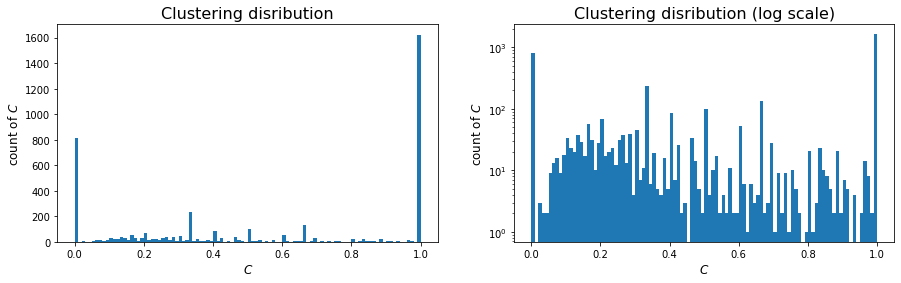

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 4))
  
ax[0].hist(list(arr_clust_coef.values()), bins=100)
ax[0].set_xlabel('$C$', fontsize=12)
ax[0].set_ylabel('count of $C$', fontsize=12)
ax[0].set_title('Clustering disribution', fontsize=16)

ax[1].hist(list(arr_clust_coef.values()), bins=100, log=True)
ax[1].set_xlabel('$C$', fontsize=12)
ax[1].set_ylabel('count of $C$', fontsize=12)
ax[1].set_title('Clustering disribution (log scale)', fontsize=16)

plt.show()

In [ ]:
#вытащим все core
kg_arr = []
k=1
kG=nx.k_core(G,k)
while len(list(kG))!=0:
    kG=nx.k_core(G,k)
    kG=[int(i) for i in kG]
    kg_arr.append((k,kG))
    k+=1

In [ ]:
#словарь нода:последний core в который входит
nodes = [int(i) for i in G.nodes()]
core_dict = {}
for n in nodes:
    buf = []
    for j in range(len(kg_arr)-1):
        if n in kg_arr[j][1]:
            buf.append(kg_arr[j][0])
    core_dict[n]=np.max(buf)

In [ ]:
#соберем список для df
core_arr = []
for i in (df['node']):
    core_arr.append(core_dict.get(i))

#### 1.2. Исследуйте корреляцию между признаками и целевой переменой

In [ ]:
df1 = df.copy()

df1['degree centrality'] = list(degree_central.values())
df1['eigenvector centrality'] = list(eigenvector_central.values())
df1['closeness centrality'] = list(closeness_central.values())
df1['betweenness centrality'] = list(betweenness_central.values())
df1['clustering'] = list(arr_clust_coef.values())
df1['cores'] = list(core_arr)
df1['class'] = list(Y)

In [ ]:
df1.head()

,node,spreading ability,degree centrality,eigenvector centrality,closeness centrality,betweenness centrality,clustering,cores,class
0,19,0.414141,0.000962,1.978526e-07,0.184101,0.002893,0.500000,3,1.0
1,1,0.418711,0.001443,1.930278e-08,0.159047,0.002290,0.333333,3,1.0
2,1751,0.402116,0.000722,1.893130e-08,0.158980,0.000000,1.000000,3,1.0
3,2408,0.389610,0.001203,5.769050e-07,0.171225,0.001707,0.400000,3,0.0
4,3078,0.409572,0.000722,1.450752e-08,0.146260,0.000481,0.333333,2,1.0


In [ ]:
df1.corr()

,node,spreading ability,degree centrality,eigenvector centrality,closeness centrality,betweenness centrality,clustering,cores,class
node,1.000000,-0.017445,-0.016867,-0.004357,0.001905,0.002424,-0.011277,-0.015907,-0.012737
spreading ability,-0.017445,1.000000,0.008903,0.010691,-0.005100,0.023741,-0.004008,0.001065,0.798408
degree centrality,-0.016867,0.008903,1.000000,0.600507,0.435221,0.488306,0.051331,0.899057,0.005637
eigenvector centrality,-0.004357,0.010691,0.600507,1.000000,0.275792,0.135088,0.055931,0.619236,0.014643
closeness centrality,0.001905,-0.005100,0.435221,0.275792,1.000000,0.473812,-0.117046,0.253214,0.012798
betweenness centrality,0.002424,0.023741,0.488306,0.135088,0.473812,1.000000,-0.284538,0.134877,0.011934
clustering,-0.011277,-0.004008,0.051331,0.055931,-0.117046,-0.284538,1.000000,0.247261,-0.013769
cores,-0.015907,0.001065,0.899057,0.619236,0.253214,0.134877,0.247261,1.000000,-0.001162
class,-0.012737,0.798408,0.005637,0.014643,0.012798,0.011934,-0.013769,-0.001162,1.000000


таргет хорошо коррелирует лишь с spreading ability, с остальными примерно на одном уровне и очень слабо

### 1.3. Разделите выборку на обучающую и тестовую, постройте модели классификации (бинарной), выведите метрики качества, подберите оптимальные гиперпараметры

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X=df1.drop(['class','node'], axis=1)
y=df1['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=45)

lr1 = LogisticRegression()
lr1.fit(X_train, y_train)
print('accuracy score:', lr1.score(X_test, y_test))
print('F1 score:', metrics.f1_score(y_test, lr1.predict(X_test)))

accuracy score: 0.6147123088128187
F1 score: 0.7536096879366557


In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
print('accuracy score:', classifier.score(X_test, y_test))
print('F1 score:', metrics.f1_score(y_test, classifier.predict(X_test)))

accuracy score: 0.8783685360524399
F1 score: 0.8972307692307693


In [ ]:
d_tree = tree.DecisionTreeClassifier()
d_tree.fit(X_train, y_train)
print('accuracy score:', d_tree.score(X_test, y_test))
print('F1 score:', metrics.f1_score(y_test, d_tree.predict(X_test)))

accuracy score: 1.0
F1 score: 1.0


In [ ]:
#отнормируем core
from sklearn import preprocessing
normalized_arr_core = preprocessing.normalize([core_arr])

In [ ]:
df1_norm = df1.copy()
df1_norm = df1_norm.drop('cores', axis=1)
df1_norm['cores'] = list(normalized_arr_core[0])

In [ ]:
X_=df1_norm.drop(['class','node'], axis=1)
y_=df1_norm['class']

X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.33, random_state=45)

lr1_ = LogisticRegression()
lr1_.fit(X_train_, y_train_)
print('accuracy score:', lr1_.score(X_test_, y_test_))
print('F1 score:', metrics.f1_score(y_test_, lr1_.predict(X_test_)))

accuracy score: 0.6139839766933721
F1 score: 0.7532588454376163


In [ ]:
classifier_ = KNeighborsClassifier(n_neighbors=5)
classifier_.fit(X_train_, y_train_)
print('accuracy score:', classifier_.score(X_test_, y_test_))
print('F1 score:', metrics.f1_score(y_test_, classifier_.predict(X_test_)))

accuracy score: 0.9395484340859432
F1 score: 0.9484792054624457


In [ ]:
d_tree_ = tree.DecisionTreeClassifier()
d_tree_.fit(X_train_, y_train_)
print('accuracy score:', d_tree_.score(X_test_, y_test_))
print('F1 score:', metrics.f1_score(y_test_, d_tree_.predict(X_test_)))

accuracy score: 1.0
F1 score: 1.0


In [ ]:
print('Подведём итоги:\ndf_train')
print('LogisticRegression: accuracy score:', lr1.score(X_test, y_test),'F1 score:', metrics.f1_score(y_test, lr1.predict(X_test)))
print('KNeighborsClassifier: accuracy score:', classifier.score(X_test, y_test),'F1 score:', metrics.f1_score(y_test, classifier.predict(X_test)))
print('DecisionTreeClassifier: accuracy score:', d_tree.score(X_test, y_test),'F1 score:', metrics.f1_score(y_test, d_tree.predict(X_test)))
print('\nна df_train с отнормированным k-core')
print('LogisticRegression: accuracy score:', lr1_.score(X_test_, y_test_),'F1 score:', metrics.f1_score(y_test_, lr1_.predict(X_test_)))
print('KNeighborsClassifier: accuracy score:', classifier_.score(X_test_, y_test_),'F1 score:', metrics.f1_score(y_test_, classifier_.predict(X_test_)))
print('DecisionTreeClassifier: accuracy score:', d_tree_.score(X_test_, y_test_),'F1 score:', metrics.f1_score(y_test_, d_tree_.predict(X_test_)))

Подведём итоги:
df_train
LogisticRegression: accuracy score: 0.6147123088128187 F1 score: 0.7536096879366557
KNeighborsClassifier: accuracy score: 0.8783685360524399 F1 score: 0.8972307692307693
DecisionTreeClassifier: accuracy score: 1.0 F1 score: 1.0

на df_train с отнормированным k-core
LogisticRegression: accuracy score: 0.6139839766933721 F1 score: 0.7532588454376163
KNeighborsClassifier: accuracy score: 0.9395484340859432 F1 score: 0.9484792054624457
DecisionTreeClassifier: accuracy score: 1.0 F1 score: 1.0


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid={"n_neighbors":[5,10,15], 'p':[1,2], 'leaf_size':[20,30,40],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
classifier_grid=KNeighborsClassifier()
classifier_cv=GridSearchCV(classifier_grid,grid,cv=10)
classifier_cv.fit(X_train,y_train)

print("tuned hpyerparameters for KNeighborsClassifier :(best parameters) ",classifier_cv.best_params_)
print("accuracy :",classifier_cv.best_score_)

tuned hpyerparameters for KNeighborsClassifier :(best parameters)  {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 5, 'p': 1}
accuracy : 0.8894058946391274


In [ ]:
#на норированном df
grid={"n_neighbors":[5,10,15], 'p':[1,2], 'leaf_size':[20,30,40],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
classifier_grid_norm=KNeighborsClassifier()
classifier_cv_norm=GridSearchCV(classifier_grid_norm,grid,cv=10)
classifier_cv_norm.fit(X_train_,y_train_)

print("tuned hpyerparameters for KNeighborsClassifier :(best parameters) ",classifier_cv_norm.best_params_)
print("accuracy :",classifier_cv_norm.best_score_)

tuned hpyerparameters for KNeighborsClassifier :(best parameters)  {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 15, 'p': 1}
accuracy : 0.9414777855135247


### 1.4. Проанализируйте важность признаков

Score 0 spreading ability : 12.836
Score 1 degree centrality : 0.022
Score 2 eigenvector centrality : -0.076
Score 3 closeness centrality : 1.066
Score 4 betweenness centrality : 0.098
Score 5 clustering : -0.066
Score 6 cores : 0.001


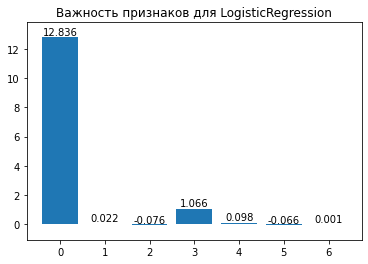

In [ ]:
feature_importance = lr1.coef_[0]
#feature_importance = 100.0 * (feature_importance / feature_importance.max())
rez = list(zip(list(X_train.columns),feature_importance))
for i in range(len(rez)):
	print('Score', i ,rez[i][0],':', np.round(rez[i][1],3))  #list(X_train.columns)
bins = [x for x in range(len(feature_importance))]
plt.bar(bins, feature_importance)

bin_centers = np.diff(bins)*0.5 + bins[:-1]
for fi, x in zip(feature_importance, bins):
  height = round(fi, 3)
  plt.annotate("{}".format(height),
               xy = (x, height),             # top left corner of the histogram bar
               xytext = (0,0.2),             # offsetting label position above its bar
               textcoords = "offset points", # Offset (in points) from the *xy* value
               ha = 'center', va = 'bottom'
               )

plt.title('Важность признаков для LogisticRegression')
plt.ylim(min(feature_importance) - 1, max(feature_importance) + 1)
plt.show()

Score 0 spreading ability : 1.0
Score 1 degree centrality : 0.0
Score 2 eigenvector centrality : 0.0
Score 3 closeness centrality : 0.0
Score 4 betweenness centrality : 0.0
Score 5 clustering : 0.0
Score 6 cores : 0.0


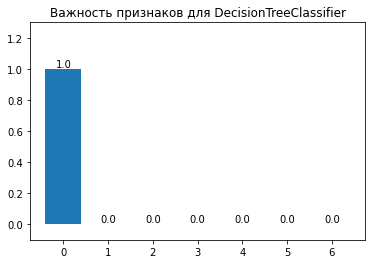

In [ ]:
feature_importance = d_tree.feature_importances_
#feature_importance = 100.0 * (feature_importance / feature_importance.max())
rez = list(zip(list(X_train.columns),feature_importance))
for i in range(len(rez)):
	print('Score', i ,rez[i][0],':', np.round(rez[i][1],3))  #list(X_train.columns)
bins = [x for x in range(len(feature_importance))]
plt.bar(bins, feature_importance)

bin_centers = np.diff(bins)*0.5 + bins[:-1]
for fi, x in zip(feature_importance, bins):
  height = round(fi, 3)
  plt.annotate("{}".format(height),
               xy = (x, height),             # top left corner of the histogram bar
               xytext = (0,0.2),             # offsetting label position above its bar
               textcoords = "offset points", # Offset (in points) from the *xy* value
               ha = 'center', va = 'bottom'
               )

plt.title('Важность признаков для DecisionTreeClassifier')
plt.ylim(min(feature_importance)-0.1, max(feature_importance) + 0.3)
plt.show()

## 2. Предсказание связей (10 баллов)

1. Разбейте сеть на обучающую и тестовую выборку, тестовая выборка должна содержать как связи, которые нужно предсказать, так и отсутствующие (выберите их случайным образом, чтобы тестовая выборка была сбалансирована). 

2. Сравните Roc-кривые для различных структурных характеристик ребер в сети. Какая лучше справляется с задачей предсказания связей по AUC ROC? 

3. Постройте модель классификации, используя структурные признаки, улучшилось ли качество предсказания?

4. Постройте модель предскзания на основе вложения (используйте вложение сети с помощью Лапласиана или Node2vec, на выбор) Сравните качество предсказания для разных размерностей используемого пространства $d$. 



In [ ]:
!wget https://snap.stanford.edu/data/email-Eu-core.txt.gz
!gzip -dk email-Eu-core.txt.gz

--2021-12-17 18:07:20--  https://snap.stanford.edu/data/email-Eu-core.txt.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79754 (78K) [application/x-gzip]
Saving to: ‘email-Eu-core.txt.gz.1’

email-Eu-core.txt.g 100%[===================>]  77.88K   363KB/s    in 0.2s    

2021-12-17 18:07:21 (363 KB/s) - ‘email-Eu-core.txt.gz.1’ saved [79754/79754]

gzip: email-Eu-core.txt already exists; do you wish to overwrite (y or n)? n
	not overwritten


### 2.1. Разбейте сеть на обучающую и тестовую выборку, тестовая выборка должна содержать как связи, которые нужно предсказать, так и отсутствующие (выберите их случайным образом, чтобы тестовая выборка была сбалансирована).

In [ ]:
G2=nx.read_adjlist('email-Eu-core.txt')
print(G2.number_of_nodes(),G2.number_of_edges())

1005 16706


In [ ]:
#на тест берем 25% ребер
edge_subset = random.sample(G2.edges(), int(0.25 * G2.number_of_edges()))

G2_train = G2.copy()
G2_train.remove_edges_from(edge_subset)
print('G2_train',G2_train.number_of_nodes(),G2_train.number_of_edges())

G2_train 1005 12530


In [ ]:
arr_nodes_of_G2 = [i for i in G2.nodes()]
arr_edges_of_G2 = [i for i in G2.edges()]

G2_test = nx.Graph()
G2_test.add_nodes_from(arr_nodes_of_G2)
G2_test.add_edges_from(edge_subset)
print('G2_test',G2_test.number_of_nodes(),G2_test.number_of_edges())

G2_test 1005 4176


In [ ]:
#создадим несуществующие ребра в test, рандомно выбирая
node1 = random.choices(arr_nodes_of_G2, k = int(0.7*G2.number_of_nodes()))
node2 = random.choices(arr_nodes_of_G2, k = int(0.7*G2.number_of_nodes()))
edges_for_G2_test = list(zip(node1,node2))
arr_edges_dop_for_G2_test = []
for i in range(len(edges_for_G2_test)):
    if ((edges_for_G2_test[i][0],edges_for_G2_test[i][1]) not in arr_edges_of_G2 
        and (edges_for_G2_test[i][1],edges_for_G2_test[i][0]) not in arr_edges_of_G2 
        and edges_for_G2_test[i][1]!=edges_for_G2_test[i][0]):
        arr_edges_dop_for_G2_test.append(edges_for_G2_test[i])

test_edges = arr_edges_dop_for_G2_test+edge_subset #########
#y_test = [1]*len(arr_edges_dop_for_G2_test)+[0]*len(edge_subset)
print('G2_test with dop edges',G2_test.number_of_nodes(),len(test_edges))

G2_test with dop edges 1005 4855


In [ ]:
#создадим несуществующие ребра в train, рандомно выбирая
#иначе таргет в 2.3 и 2.4 будет забит только единицами и резы будут средним по y_test
node1 = random.choices(arr_nodes_of_G2, k = int(0.7*G2.number_of_nodes()))
node2 = random.choices(arr_nodes_of_G2, k = int(0.7*G2.number_of_nodes()))
edges_for_G2_train = list(zip(node1,node2))
arr_edges_dop_for_G2_train = []
for i in range(len(edges_for_G2_train)):
    if ((edges_for_G2_train[i][0],edges_for_G2_train[i][1]) not in arr_edges_of_G2 
        and (edges_for_G2_train[i][1],edges_for_G2_train[i][0]) not in arr_edges_of_G2 
        and edges_for_G2_train[i][1]!=edges_for_G2_train[i][0] 
        and (edges_for_G2_train[i][0],edges_for_G2_train[i][1]) not in test_edges 
        and (edges_for_G2_train[i][1],edges_for_G2_train[i][0]) not in test_edges):
        arr_edges_dop_for_G2_train.append(edges_for_G2_test[i])

edges_G2_train = [i for i in G2_train.edges()]
train_edges = arr_edges_dop_for_G2_train+edges_G2_train #########
#y_train = [1]*len(edges_G2_train)+[0]*len(arr_edges_dop_for_G2_train)
print('G2_train with dop edges',G2_train.number_of_nodes(),len(train_edges))

G2_train with dop edges 1005 13208


### 2.2. Сравните Roc-кривые для различных структурных характеристик ребер в сети. Какая лучше справляется с задачей предсказания связей по AUC ROC?


In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
prediction_jaccard = list(nx.jaccard_coefficient(G2_train))
scores_jaccard, y_jaccard = list(zip(*[(s, (u,v) in G2_test.edges()) for (u,v,s) in prediction_jaccard]))
fpr_j, tpr_j, thresholds = roc_curve(y_jaccard, scores_jaccard)

prediction_adamic_adar = list(nx.adamic_adar_index(G2_train))
scores_ad, y_ad = zip(*[(s, (u,v) in G2_test.edges()) for (u,v,s) in prediction_adamic_adar])
fpr_ad, tpr_ad, thresholds_ad = roc_curve(y_ad, scores_ad)

prediction_pr = list(nx.preferential_attachment(G2_train))
scores_pr, y_pr = zip(*[(s, (u,v) in G2_test.edges()) for (u,v,s) in prediction_pr])
fpr_pr, tpr_pr, thresholds_pr = roc_curve(y_pr, scores_pr)

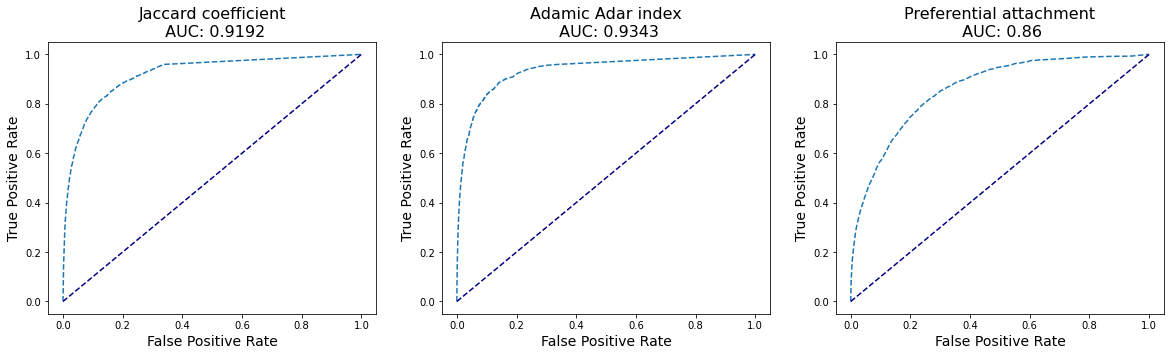

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(20, 5))
  
ax[0].plot(fpr_j,tpr_j,'--')
ax[0].plot([0, 1], [0, 1], color="navy",  linestyle="--")
ax[0].set_title(('Jaccard coefficient\n AUC: '+ str(round(auc(fpr_j,tpr_j),4))), fontsize=16)
ax[0].set_xlabel("False Positive Rate", fontsize=14)
ax[0].set_ylabel("True Positive Rate", fontsize=14)

ax[1].plot(fpr_ad,tpr_ad,'--')
ax[1].plot([0, 1], [0, 1], color="navy",  linestyle="--")
ax[1].set_title(('Adamic Adar index\n AUC: '+ str(round(auc(fpr_ad,tpr_ad),4))), fontsize=16)
ax[1].set_xlabel("False Positive Rate", fontsize=14)
ax[1].set_ylabel("True Positive Rate", fontsize=14)

ax[2].plot(fpr_pr,tpr_pr,'--')
ax[2].plot([0, 1], [0, 1], color="navy",  linestyle="--")
ax[2].set_title(('Preferential attachment\n AUC: '+ str(round(auc(fpr_pr,tpr_pr),4))), fontsize=16)
ax[2].set_xlabel("False Positive Rate", fontsize=14)
ax[2].set_ylabel("True Positive Rate", fontsize=14)

plt.show()

лучше всего справляется Adamic Adar index

### 2.3. Постройте модель классификации, используя структурные признаки, улучшилось ли качество предсказания?

In [ ]:
#train df
prediction_jaccard2 = list(nx.jaccard_coefficient(G2_train,train_edges))
scores_jaccard2, y_jaccard2 = list(zip(*[(s, (u,v) in G2_train.edges()) for (u,v,s) in prediction_jaccard2]))

prediction_pr2 = list(nx.preferential_attachment(G2_train,train_edges))
scores_pr2, y_pr2 = zip(*[(s, (u,v) in G2_train.edges()) for (u,v,s) in prediction_pr2])

In [ ]:
#test df
prediction_jaccard3 = list(nx.jaccard_coefficient(G2_train,test_edges))
scores_jaccard3, y_jaccard3 = list(zip(*[(s, (u,v) in G2_test.edges()) for (u,v,s) in prediction_jaccard3]))

prediction_pr3 = list(nx.preferential_attachment(G2_train,test_edges))
scores_pr3, y_pr3 = zip(*[(s, (u,v) in G2_test.edges()) for (u,v,s) in prediction_pr3])

In [ ]:
df_3_train = pd.DataFrame({'jaccard':scores_jaccard2, 'preferential_attachment':preprocessing.normalize([scores_pr2])[0]})#X_train
df_3_test = pd.DataFrame({'jaccard':scores_jaccard3, 'preferential_attachment':preprocessing.normalize([scores_pr3])[0]})#X_test

Accuracy score: 0.8910401647785788
F1 score: 0.9383090379008746
AUC:  0.7367716638735125


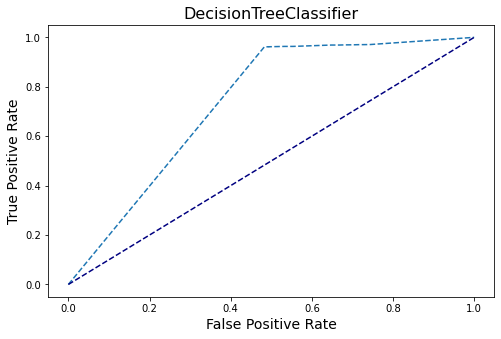

In [ ]:
y_train = y_jaccard2
y_test = y_jaccard3

d_tree_auc = tree.DecisionTreeClassifier()
d_tree_auc.fit(df_3_train, y_train)
y_pred_d_tree_auc = d_tree_auc.predict(df_3_test)
y_pred_prob_d_tree_auc = d_tree_auc.predict_proba(df_3_test)[:, 1]
print('Accuracy score:', metrics.accuracy_score(y_test, y_pred_d_tree_auc))
print('F1 score:', metrics.f1_score(y_test, y_pred_d_tree_auc))

fpr_dtc, tpr_dtc, _ = roc_curve(y_test, y_pred_prob_d_tree_auc)

fig = plt.figure(figsize=(8, 5))
print("AUC: " , auc(fpr_dtc,tpr_dtc))
plt.plot(fpr_dtc,tpr_dtc,'--')
plt.plot([0, 1], [0, 1], color="navy",  linestyle="--")
plt.title('DecisionTreeClassifier', fontsize=16)
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)

plt.show()

Accuracy score: 0.7944387229660144
F1 score: 0.8662556955239882
AUC:  0.9315772434106951


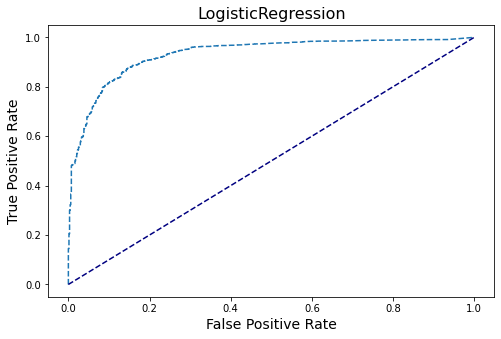

In [ ]:
y_train = y_jaccard2
y_test = y_jaccard3

lr_auc = LogisticRegression(class_weight='balanced')
lr_auc.fit(df_3_train, y_train)
y_pred_lr_auc = lr_auc.predict(df_3_test)
y_pred_prob_lr_auc = lr_auc.predict_proba(df_3_test)[:, 1]
print('Accuracy score:', metrics.accuracy_score(y_test, y_pred_lr_auc))
print('F1 score:', metrics.f1_score(y_test, y_pred_lr_auc))

fpr_lr_auc2, tpr_lr_auc2, _ = roc_curve(y_test, y_pred_prob_lr_auc)

fig = plt.figure(figsize=(8, 5))
print("AUC: " , auc(fpr_lr_auc2,tpr_lr_auc2))
plt.plot(fpr_lr_auc2,tpr_lr_auc2,'--')
plt.plot([0, 1], [0, 1], color="navy",  linestyle="--")
plt.title('LogisticRegression', fontsize=16)
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)

plt.show()

по AUC ROC примерно тоже самое получилось но логистической регрессии

### 2.4. Постройте модель предскзания на основе вложения (используйте вложение сети с помощью Лапласиана или Node2vec, на выбор) Сравните качество предсказания для разных размерностей используемого пространства  𝑑 .

In [ ]:
!pip3 install -q nodevectors 
!pip install -q node2vec

In [ ]:
from node2vec import Node2Vec
from nodevectors import Node2Vec as n2

In [ ]:
node2vec8 = Node2Vec(G2_train, dimensions=8, walk_length=30, num_walks=200, workers=4)

Computing transition probabilities:   0%|          | 0/1005 [00:00<?, ?it/s]

In [ ]:
model8 = node2vec8.fit(window=10, min_count=1, batch_words=4)

prediction_wv8 = [(u, v, 0.5 + 0.5 * model8.wv.similarity(u, v)) for (u, v) in test_edges]
scores_wv8, y_wv8 = zip(*[(s, (u,v) in G2_test.edges()) for (u,v,s) in prediction_wv8])
fpr_wv8, tpr_wv8, thresholds_pr8 = roc_curve(y_wv8, scores_wv8)

In [ ]:
node2vec32 = Node2Vec(G2_train, dimensions=32, walk_length=30, num_walks=200, workers=4)

Computing transition probabilities:   0%|          | 0/1005 [00:00<?, ?it/s]

In [ ]:
model32 = node2vec32.fit(window=10, min_count=1, batch_words=4)

prediction_wv32 = [(u, v, 0.5 + 0.5 * model32.wv.similarity(u, v)) for (u, v) in test_edges]
scores_wv32, y_wv32 = zip(*[(s, (u,v) in G2_test.edges()) for (u,v,s) in prediction_wv32])
fpr_wv32, tpr_wv32, thresholds_pr32 = roc_curve(y_wv32, scores_wv32)

In [ ]:
node2vec64 = Node2Vec(G2_train, dimensions=64, walk_length=30, num_walks=200, workers=4)

Computing transition probabilities:   0%|          | 0/1005 [00:00<?, ?it/s]

In [ ]:
model64 = node2vec64.fit(window=10, min_count=1, batch_words=4)

prediction_wv64 = [(u, v, 0.5 + 0.5 * model64.wv.similarity(u, v)) for (u, v) in test_edges]
scores_wv64, y_wv64 = zip(*[(s, (u,v) in G2_test.edges()) for (u,v,s) in prediction_wv64])
fpr_wv64, tpr_wv64, thresholds_pr64 = roc_curve(y_wv64, scores_wv64)

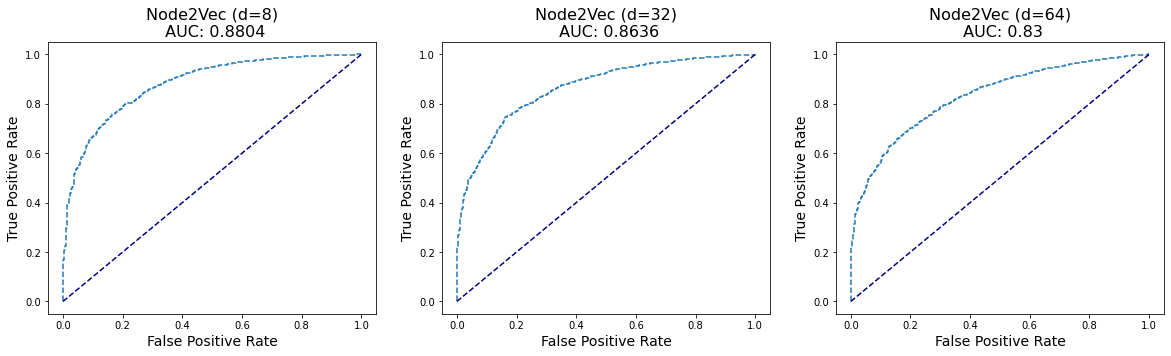

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(20, 5))
  
ax[0].plot(fpr_wv8, tpr_wv8,'--')
ax[0].plot([0, 1], [0, 1], color="navy",  linestyle="--")
ax[0].set_title(('Node2Vec (d=8)\n AUC: '+ str(round(auc(fpr_wv8, tpr_wv8),4))), fontsize=16)
ax[0].set_xlabel("False Positive Rate", fontsize=14)
ax[0].set_ylabel("True Positive Rate", fontsize=14)

ax[1].plot(fpr_wv32, tpr_wv32,'--')
ax[1].plot([0, 1], [0, 1], color="navy",  linestyle="--")
ax[1].set_title(('Node2Vec (d=32)\n AUC: '+ str(round(auc(fpr_wv32, tpr_wv32),4))), fontsize=16)
ax[1].set_xlabel("False Positive Rate", fontsize=14)
ax[1].set_ylabel("True Positive Rate", fontsize=14)

ax[2].plot(fpr_wv64, tpr_wv64,'--')
ax[2].plot([0, 1], [0, 1], color="navy",  linestyle="--")
ax[2].set_title(('Node2Vec (d=64)\n AUC: '+ str(round(auc(fpr_wv64, tpr_wv64),4))), fontsize=16)
ax[2].set_xlabel("False Positive Rate", fontsize=14)
ax[2].set_ylabel("True Positive Rate", fontsize=14)

plt.show()

## 3. Задача кластеризации (10 баллов)

 Каждый сотдрудник относится к одному из департаментов, которые и являются истинными сообществами в сети. 

1. Постройте распределение размеров сообществ в сети, какова доля вершин в наибольшем сообществе? В наименьшем? 

2. Рассмотрим задачу поиска сообществ с помощью агломеративного метода, постройте зависимость метрик качества от числа задаваемых сообществ. 
Какое разбиение оказывается более близким к истинному? 

3. Выполните пункт 2) для алгоритма Гирвана-Ньюмана. Сравните качество агломеративного метода и Гирвана-Ньюмана. 

### 3.1. Постройте распределение размеров сообществ в сети, какова доля вершин в наибольшем сообществе? В наименьшем?

In [ ]:
!wget https://snap.stanford.edu/data/email-Eu-core-department-labels.txt.gz
!gzip -dk email-Eu-core-department-labels.txt.gz

--2021-12-17 18:48:51--  https://snap.stanford.edu/data/email-Eu-core-department-labels.txt.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2663 (2.6K) [application/x-gzip]
Saving to: ‘email-Eu-core-department-labels.txt.gz.1’

email-Eu-core-depar 100%[===================>]   2.60K  --.-KB/s    in 0s      

2021-12-17 18:48:51 (86.6 MB/s) - ‘email-Eu-core-department-labels.txt.gz.1’ saved [2663/2663]

gzip: email-Eu-core-department-labels.txt already exists; do you wish to overwrite (y or n)? n
	not overwritten


In [ ]:
df3=pd.read_csv('email-Eu-core-department-labels.txt',sep=' ', names=['node', 'label'])

In [ ]:
df3.head()

,node,label
0,0,1
1,1,1
2,2,21
3,3,21
4,4,21


In [ ]:
import itertools

In [ ]:
x = list(int(i) for i in df3.label)
size_of_comms = {i: x.count(i) for i in x}
print(size_of_comms)

{1: 65, 21: 61, 25: 6, 14: 92, 9: 32, 26: 9, 4: 109, 17: 35, 34: 13, 11: 29, 5: 18, 10: 39, 36: 22, 37: 15, 7: 51, 22: 25, 8: 19, 15: 55, 3: 12, 29: 5, 20: 14, 16: 25, 38: 13, 27: 10, 13: 26, 6: 28, 0: 49, 28: 8, 2: 10, 40: 4, 35: 13, 23: 27, 19: 29, 24: 6, 32: 9, 31: 8, 39: 3, 12: 3, 30: 4, 41: 2, 18: 1, 33: 1}


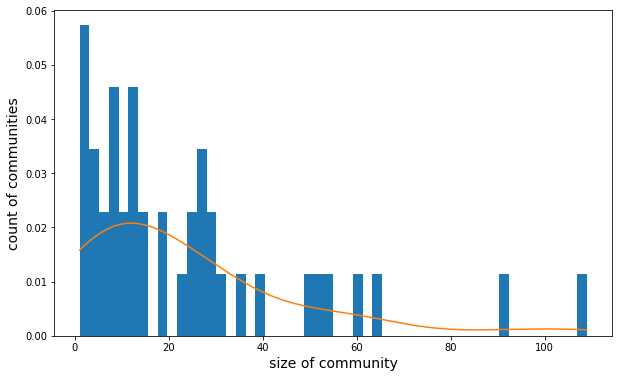

In [ ]:
from scipy import stats


fig = plt.figure(figsize=(10,6))
data = [i for i in size_of_comms.values()]
_, xx, _ = plt.hist(data, bins=len(size_of_comms)+10, density=True)
kde = stats.gaussian_kde(data)
xx = np.linspace(xx[0], xx[-1], 1000)
plt.plot(xx, kde(xx))
plt.xlabel("size of community", fontsize=14)
plt.ylabel('count of communities', fontsize=14)
plt.show()

In [ ]:
import operator

sorted_size_comm = sorted(size_of_comms.items(), key=operator.itemgetter(1))
print('доля наименьшего сообщества:',np.round(sorted_size_comm[0][1]/G2.number_of_nodes(),5))
print('доля наибольшего сообщества:',np.round(sorted_size_comm[-1][1]/G2.number_of_nodes(),5))

доля наименьшего сообщества: 0.001
доля наибольшего сообщества: 0.10846


### 3.2. Рассмотрим задачу поиска сообществ с помощью агломеративного метода, постройте зависимость метрик качества от числа задаваемых сообществ. Какое разбиение оказывается более близким к истинному?

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics.cluster import normalized_mutual_info_score

In [ ]:
def similarity_matrix(G, nodelist=None): # nodelist задает порядок строк в матрице
    if (nodelist is None):
        nodelist=list(G.nodes)

    Smatrix=np.zeros((len(nodelist), len(nodelist)))

    for i, node1 in enumerate(nodelist):
        for j, node2 in enumerate(nodelist[i+1:], start = i+1):
            Smatrix[i,j]=(len(set(G[node1]) & set(G[node2])) + int(G.has_edge(node1,node2)))/(np.min([len(G[node1]),len(G[node2])])
                                                                                          +1-int(G.has_edge(node1,node2)))
            Smatrix[j,i]=Smatrix[i,j]

    return Smatrix

In [ ]:
num_comm = list(set(x))
arr_rez_accuracy = []
arr_rez_mi = []
for i in range(2,num_comm[-1]+1):
    communities = AgglomerativeClustering(linkage='average', n_clusters = i)
    X=similarity_matrix(G2,nodelist=None)
    communities.fit(X)
    y_pred=communities.labels_
    y_true=x
    score_acc = accuracy_score(y_true, y_pred)
    arr_rez_accuracy.append(score_acc)
    score_mi = normalized_mutual_info_score(y_true, y_pred)
    arr_rez_mi.append(score_mi)
    print(i,'/',num_comm[-1])

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


2 / 41


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


3 / 41


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


4 / 41


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


5 / 41


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


6 / 41


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


7 / 41


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


8 / 41


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


9 / 41


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


10 / 41


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


11 / 41


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


12 / 41


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


13 / 41


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


14 / 41


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


15 / 41


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


16 / 41


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


17 / 41


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


18 / 41


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


19 / 41


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


20 / 41


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


21 / 41


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


22 / 41


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


23 / 41


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


24 / 41


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


25 / 41


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


26 / 41


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


27 / 41


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


28 / 41


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


29 / 41


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


30 / 41


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


31 / 41


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


32 / 41


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


33 / 41


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


34 / 41


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


35 / 41


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


36 / 41


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


37 / 41


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


38 / 41


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


39 / 41


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


40 / 41


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


41 / 41


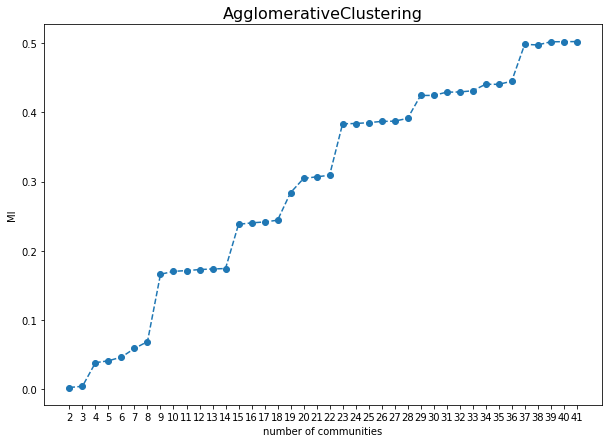

In [ ]:
fig = plt.figure(figsize=(10,7))
plt.plot(range(2,num_comm[-1]+1), arr_rez_mi, '--o')
plt.xticks(range(2,num_comm[-1]+1))
plt.title('AgglomerativeClustering', fontsize=16)
plt.xlabel('number of communities')
plt.ylabel('MI')
plt.show()

метрика улучшается не линено, но все равно  увеличивается с приближением к реальному числу классов

### 3.3. Выполните пункт 2) для алгоритма Гирвана-Ньюмана. Сравните качество агломеративного метода и Гирвана-Ньюмана.

In [ ]:
import itertools
comp = nx.algorithms.community.girvan_newman(G2)
k_clusters = []
scores = []
for communities in itertools.islice(comp, 2,num_comm[-1]-19):
    l = list(sorted(c) for c in communities)
    k_clusters.append(len(l))
    preds =  np.zeros(len(df3))
    for i, community in enumerate(l):
        for node in community:
            preds[int(node)] = i
    scores.append(normalized_mutual_info_score(df3['label'].values.astype('int'), preds))

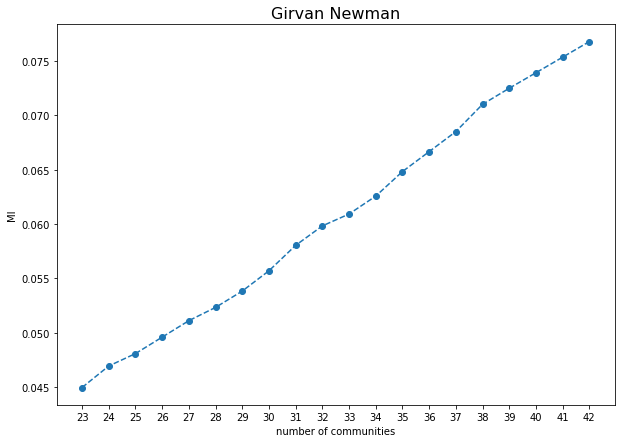

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(k_clusters, scores, 'o--')
plt.xticks(k_clusters)
plt.title('Girvan Newman',fontsize=16)
plt.xlabel('number of communities')
plt.ylabel('MI')
plt.show()

для совпадающего количества кластеров агломеративный метод показывает себя лучше